In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.Series([20.1, 15.3, 32.5, 45.8, 33.4],
                index = ['a','b','c','d','e'])

In [3]:
data

a    20.1
b    15.3
c    32.5
d    45.8
e    33.4
dtype: float64

In [4]:
o_population = {'Nigeria': 12093883,
               'Colombia': 21333424,
               'Ghana' : 354546,
               'South_Africa' : 34354353,
               'Paris' : 342342,
               'Dubia' : 43235534}
population = pd.Series(o_population)

In [5]:
population

Nigeria         12093883
Colombia        21333424
Ghana             354546
South_Africa    34354353
Paris             342342
Dubia           43235534
dtype: int64

In [8]:
o_area = {'Nigeria': 1205,
     'Colombia': 2133,
     'Ghana' : 3544,
     'South_Africa' : 4567,
     'Paris' : 3423,
     'Dubia' : 4320}
area = pd.Series(o_area)

In [9]:
area

Nigeria         1205
Colombia        2133
Ghana           3544
South_Africa    4567
Paris           3423
Dubia           4320
dtype: int64

In [13]:
states = pd.DataFrame({'population' : population,
                     'area' : area})
states

,population,area
Nigeria,12093883,1205
Colombia,21333424,2133
Ghana,354546,3544
South_Africa,34354353,4567
Paris,342342,3423
Dubia,43235534,4320


In [14]:
states.index

Index(['Nigeria', 'Colombia', 'Ghana', 'South_Africa', 'Paris', 'Dubia'], dtype='object')

In [15]:
states['area']

Nigeria         1205
Colombia        2133
Ghana           3544
South_Africa    4567
Paris           3423
Dubia           4320
Name: area, dtype: int64

In [16]:
pd.DataFrame(population, columns = ['population'])

,population
Nigeria,12093883
Colombia,21333424
Ghana,354546
South_Africa,34354353
Paris,342342
Dubia,43235534


In [21]:
me = np.random.RandomState(12)
okay = pd.Series(me.randint(0, 10, 4))
okay

0    6
1    1
2    2
3    3
dtype: int32

In [24]:
data = pd.Series([1, np.nan, 2, None, 3],
                 index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [27]:
data.interpolate(methhod='akima')

a    1.0
b    1.5
c    2.0
d    2.5
e    3.0
dtype: float64

In [28]:
data = pd.Series([1, np.nan, 2, None, 3],
                 index=list('abcde'))
data.dropna()

a    1.0
c    2.0
e    3.0
dtype: float64

In [30]:
data.isnull()

a    False
b     True
c    False
d     True
e    False
dtype: bool

In [31]:
index = [('California', 2000), ('California', 2010),
        ('New York', 2000), ('New York', 2010),
        ('Texas', 2000), ('Texas', 2010)]

populations = [33871648, 37253956,
                18976457, 19378102,
                20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [33]:
index = pd.MultiIndex.from_tuples(index)
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [40]:
df = pd.DataFrame(np.random.rand(4, 2),
                index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                columns=['data1', 'data2'])

df

data1     data2
a 1  0.634890  0.911875
  2  0.935401  0.100600
b 1  0.180983  0.840155
  2  0.287005  0.668510

In [41]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.7  34.0  37.3  45.0  36.7
     2      20.0  37.0  32.0  37.0  35.0  35.2
2014 1      21.0  37.7  49.0  37.7  26.0  37.1
     2      31.0  37.6  53.0  37.7  26.0  38.2

In [47]:
health_data.unstack()

subject   Bob                   Guido                     Sue              \
type       HR        Temp          HR        Temp          HR        Temp   
visit       1     2     1     2     1     2     1     2     1     2     1   
year                                                                        
2013     24.0  20.0  36.7  37.0  34.0  32.0  37.3  37.0  45.0  35.0  36.7   
2014     21.0  31.0  37.7  37.6  49.0  53.0  37.7  37.7  26.0  26.0  37.1   

subject        
type           
visit       2  
year           
2013     35.2  
2014     38.2

In [48]:
health_data.unstack(level=0)

subject   Bob                   Guido                     Sue              \
type       HR        Temp          HR        Temp          HR        Temp   
year     2013  2014  2013  2014  2013  2014  2013  2014  2013  2014  2013   
visit                                                                       
1        24.0  21.0  36.7  37.7  34.0  49.0  37.3  37.7  45.0  26.0  36.7   
2        20.0  31.0  37.0  37.6  32.0  53.0  37.0  37.7  35.0  26.0  35.2   

subject        
type           
year     2014  
visit          
1        37.1  
2        38.2

In [49]:
health_data.unstack().stack()

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.7  34.0  37.3  45.0  36.7
     2      20.0  37.0  32.0  37.0  35.0  35.2
2014 1      21.0  37.7  49.0  37.7  26.0  37.1
     2      31.0  37.6  53.0  37.7  26.0  38.2

In [50]:
health_data.T

year          2013        2014      
visit            1     2     1     2
subject type                        
Bob     HR    24.0  20.0  21.0  31.0
        Temp  36.7  37.0  37.7  37.6
Guido   HR    34.0  32.0  49.0  53.0
        Temp  37.3  37.0  37.7  37.7
Sue     HR    45.0  35.0  26.0  26.0
        Temp  36.7  35.2  37.1  38.2

In [10]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [11]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [8]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [13]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [14]:
df5 = pd.merge(df3, df4)
df5

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [15]:
df6 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                    'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                    'spreadsheets', 'organization']})
df6

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


In [16]:
df7 = pd.merge(df1,df6)
df7

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [1]:
#install pandas_datareader
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='google')
goog.head()

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
sns.set()

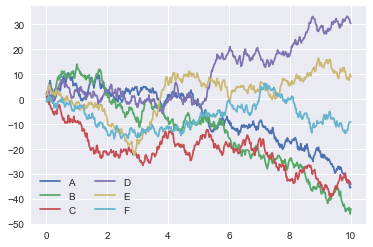

In [26]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='lower left');